In [63]:
from IPython.display import Image

## basics

- 常见词最好不要再切分
    - 否则会显著地增加 token 的长度
- 设置

```
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token
```

In [1]:
from transformers import AutoTokenizer

In [2]:
def tokenize_str(tokenizer, text):
    input_ids = tokenizer(text, add_special_tokens=False)['input_ids']
    return [tokenizer.decode(token_id) for token_id in input_ids]

In [3]:
tokenizer_t5 = AutoTokenizer.from_pretrained('t5-base')

/home/whaow/anaconda3/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [8]:
print(tokenize_str(tokenizer_t5, 'hello'))
# t5 tokenizer for 'sex'
tokenize_str(tokenizer_t5, 'sex')

['hello']


['', 's', 'ex']

## tokenize python code

- 256 ~ 143,859
    - BPE: from 256 byte values;
    - iteratively merging the most frequently co-occurring pair of tokens in the vocabulary

In [102]:
python_code = r'''def say_hello():
    print('Hello, World!')
    
# print hello
say_hello()
'''
print(python_code)

def say_hello():
    print('Hello, World!')
    
# print hello
say_hello()



In [101]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')
print(tokenizer(python_code)['input_ids'])
print(tokenizer(python_code).tokens())

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /media/whaow/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    

[4299, 910, 62, 31373, 33529, 198, 220, 220, 220, 3601, 10786, 15496, 11, 2159, 0, 11537, 198, 220, 220, 220, 220, 198, 2, 3601, 23748, 198, 16706, 62, 31373, 3419, 198]
['def', 'Ġsay', '_', 'hello', '():', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġprint', "('", 'Hello', ',', 'ĠWorld', '!', "')", 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ', 'Ċ', '#', 'Ġprint', 'Ġhello', 'Ċ', 'say', '_', 'hello', '()', 'Ċ']


In [17]:
# none
tokenizer.backend_tokenizer.normalizer

In [19]:
# pretokenization
# offset tracking
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(python_code)

[('Ċ', (0, 1)),
 ('def', (1, 4)),
 ('Ġsay', (4, 8)),
 ('_', (8, 9)),
 ('hello', (9, 14)),
 ('():', (14, 17)),
 ('ĊĠĠĠ', (17, 21)),
 ('Ġprint', (21, 27)),
 ("('", (27, 29)),
 ('Hello', (29, 34)),
 (',', (34, 35)),
 ('Ġworld', (35, 41)),
 ("!')", (41, 44)),
 ('Ċ', (44, 45)),
 ('#', (45, 46)),
 ('Ġprint', (46, 52)),
 ('Ġhello', (52, 58)),
 ('Ċ', (58, 59)),
 ('say', (59, 62)),
 ('_', (62, 63)),
 ('hello', (63, 68)),
 ('Ċ', (68, 69))]

In [45]:
ord(b'\xe2')

226

In [47]:
# Unicode character composed of 1-4 bytes

a, e = u'a', u'€'

# 1 bytes
byte = ord(a.encode('utf-8'))
print(f"{a}, {a.encode('utf-8')}, {byte}")

# 4 bytes
# byte = ord(e.encode('utf-8'))
# ord 接受的是一个char
byte = [ord(chr(i)) for i in e.encode('utf-8')]
print(f"{e}, {e.encode('utf-8')}, {byte}")

a, b'a', 97
€, b'\xe2\x82\xac', [226, 130, 172]


## training a tokenizer

- 不涉及权重或者反向传播
- tokenizer 的 processing pipeline
    - normalization
    - pretokenization
    - tokenizer model
    - postprocesssing
- subword tokenization algorithms (subword: tokens are part of words)
    - BPE: byte pair encoding
        - 迭代式地添加策略，直到一个 target vocabulary size
    - word piece
    - unigram
        - 迭代式地删除策略，直到一个 target vocabulary size


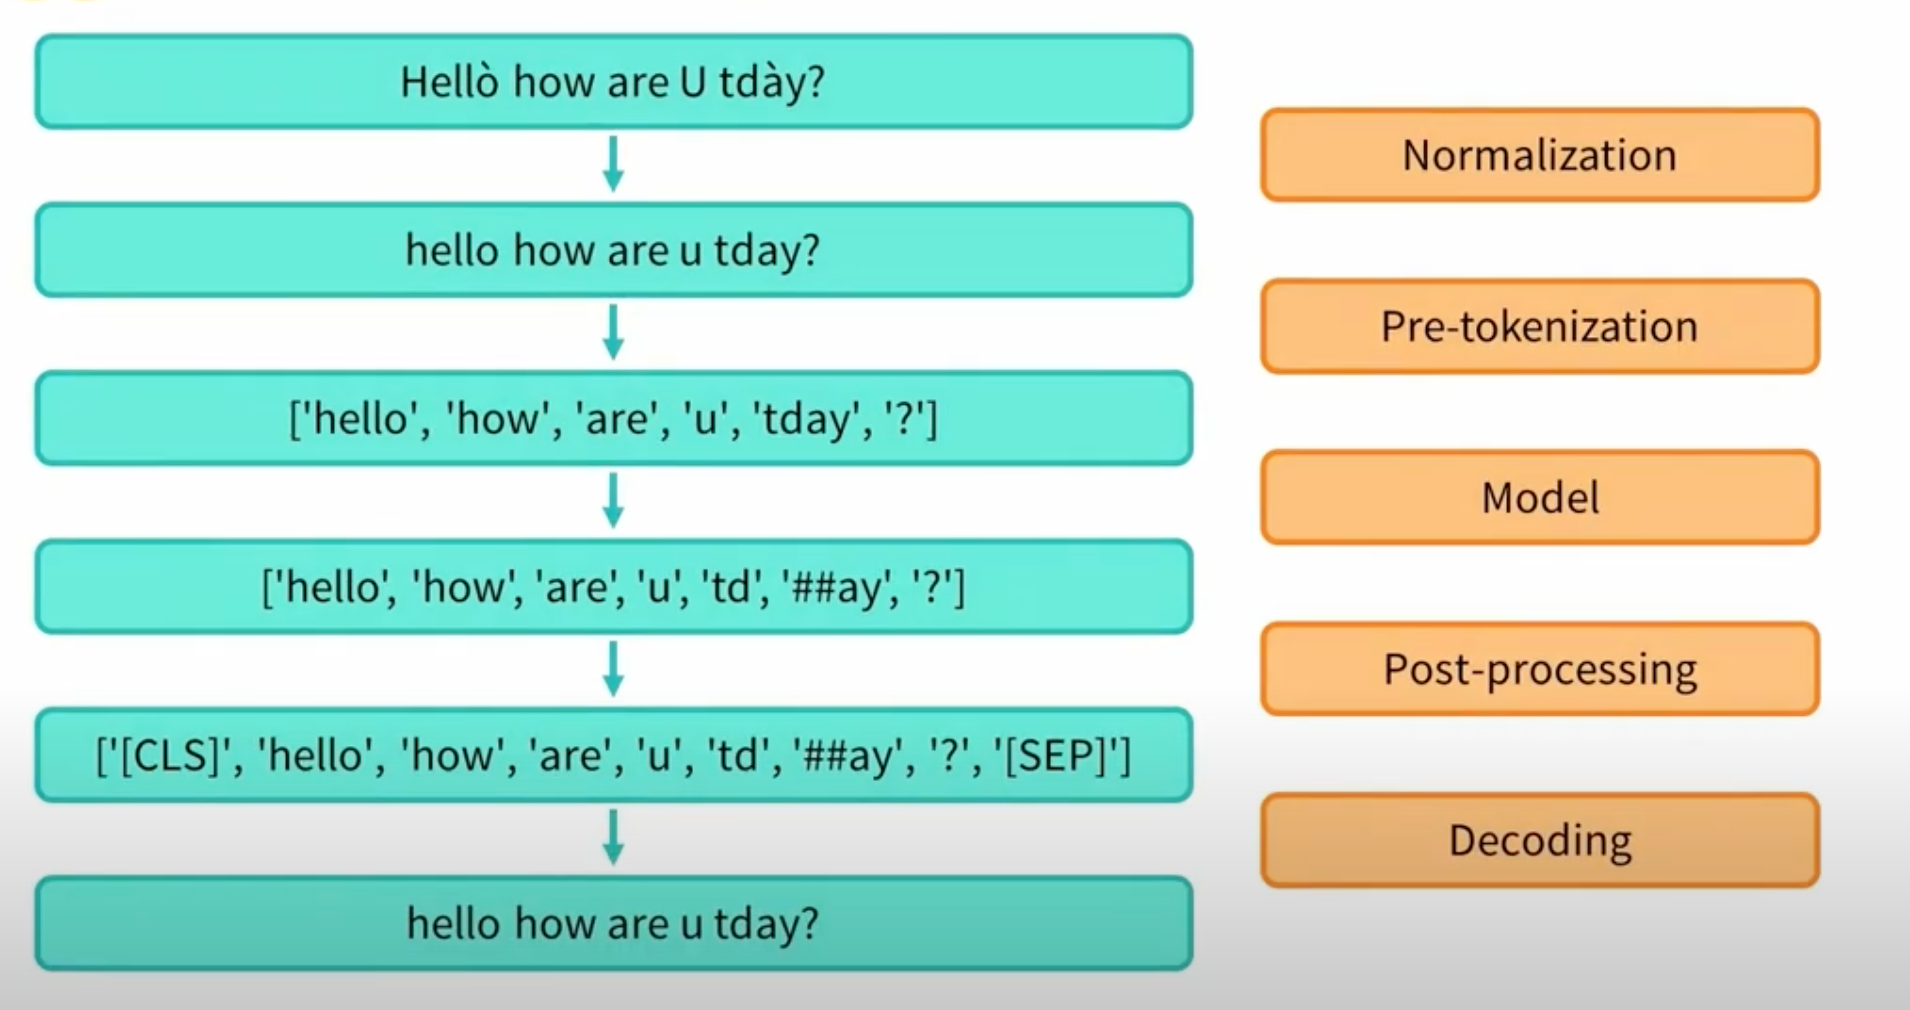

In [66]:
Image('../imgs/token_steps.png', width=600)

### BERT

- https://colab.research.google.com/github/huggingface/notebooks/blob/master/course/videos/building_tokenizer.ipynb

In [67]:
from datasets import load_dataset

In [80]:
# name: subset
dataset = load_dataset('wikitext', name='wikitext-2-raw-v1', split='train')
def get_training_corpus(dataset):
    for i in range(0, len(dataset), 1000):
        yield dataset[i:i+1000]['text']

Using the latest cached version of the module from /media/whaow/.cache/huggingface/modules/datasets_modules/datasets/wikitext/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126 (last modified on Mon Jul 10 22:16:34 2023) since it couldn't be found locally at wikitext., or remotely on the Hugging Face Hub.
Found cached dataset wikitext (/media/whaow/.cache/huggingface/datasets/wikitext/wikitext-2-raw-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126)


In [81]:
from tokenizers import Tokenizer, models, 
tokenizer = Tokenizer(models.WordPiece(unk_token='[UNK]'))

### gpt2

- 

| Description                                        | Character   | Bytes     | Mapped bytes |
|----------------------------------------------------|-------------|-----------|--------------|
| Regular characters                                 | `a` and `?` | 97 and 63 | `a` and `?`  |
| A nonprintable control character (carriage return) | `U+000D`    | 13        | `č`          |
| A space                                            | ` `         | 32        | **`Ġ`**      |
| A nonbreakable space                               | `\xa0`      | 160       | `ł`          |
| A newline character                                | `\n`        | 10        | **`Ċ`**      |

In [50]:
from transformers.models.gpt2.tokenization_gpt2 import bytes_to_unicode

In [58]:
bytes_to_unicode_map = bytes_to_unicode()
bytes_to_unicode_map

{33: '!',
 34: '"',
 35: '#',
 36: '$',
 37: '%',
 38: '&',
 39: "'",
 40: '(',
 41: ')',
 42: '*',
 43: '+',
 44: ',',
 45: '-',
 46: '.',
 47: '/',
 48: '0',
 49: '1',
 50: '2',
 51: '3',
 52: '4',
 53: '5',
 54: '6',
 55: '7',
 56: '8',
 57: '9',
 58: ':',
 59: ';',
 60: '<',
 61: '=',
 62: '>',
 63: '?',
 64: '@',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 91: '[',
 92: '\\',
 93: ']',
 94: '^',
 95: '_',
 96: '`',
 97: 'a',
 98: 'b',
 99: 'c',
 100: 'd',
 101: 'e',
 102: 'f',
 103: 'g',
 104: 'h',
 105: 'i',
 106: 'j',
 107: 'k',
 108: 'l',
 109: 'm',
 110: 'n',
 111: 'o',
 112: 'p',
 113: 'q',
 114: 'r',
 115: 's',
 116: 't',
 117: 'u',
 118: 'v',
 119: 'w',
 120: 'x',
 121: 'y',
 122: 'z',
 123: '{',
 124: '|',
 125: '}',
 126: '~',
 161: '¡',
 162: '¢',
 163: '£',

In [59]:
# string to id
unicode_to_bytes_map = dict((v, k) for k, v in bytes_to_unicode_map.items())
# 
unicode_to_bytes_map

{'!': 33,
 '"': 34,
 '#': 35,
 '$': 36,
 '%': 37,
 '&': 38,
 "'": 39,
 '(': 40,
 ')': 41,
 '*': 42,
 '+': 43,
 ',': 44,
 '-': 45,
 '.': 46,
 '/': 47,
 '0': 48,
 '1': 49,
 '2': 50,
 '3': 51,
 '4': 52,
 '5': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57,
 ':': 58,
 ';': 59,
 '<': 60,
 '=': 61,
 '>': 62,
 '?': 63,
 '@': 64,
 'A': 65,
 'B': 66,
 'C': 67,
 'D': 68,
 'E': 69,
 'F': 70,
 'G': 71,
 'H': 72,
 'I': 73,
 'J': 74,
 'K': 75,
 'L': 76,
 'M': 77,
 'N': 78,
 'O': 79,
 'P': 80,
 'Q': 81,
 'R': 82,
 'S': 83,
 'T': 84,
 'U': 85,
 'V': 86,
 'W': 87,
 'X': 88,
 'Y': 89,
 'Z': 90,
 '[': 91,
 '\\': 92,
 ']': 93,
 '^': 94,
 '_': 95,
 '`': 96,
 'a': 97,
 'b': 98,
 'c': 99,
 'd': 100,
 'e': 101,
 'f': 102,
 'g': 103,
 'h': 104,
 'i': 105,
 'j': 106,
 'k': 107,
 'l': 108,
 'm': 109,
 'n': 110,
 'o': 111,
 'p': 112,
 'q': 113,
 'r': 114,
 's': 115,
 't': 116,
 'u': 117,
 'v': 118,
 'w': 119,
 'x': 120,
 'y': 121,
 'z': 122,
 '{': 123,
 '|': 124,
 '}': 125,
 '~': 126,
 '¡': 161,
 '¢': 162,
 '£': 163,

In [53]:
len(bytes_to_unicode_map)

256

In [62]:
base_vocab = list(unicode_to_bytes_map.keys())
print(base_vocab[0], base_vocab[-1])

! Ń


In [91]:
print(bytes_to_unicode_map[10])


Ċ
33


In [90]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(python_code)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /media/whaow/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    

[('Ċ', (0, 1)),
 ('def', (1, 4)),
 ('Ġsay', (4, 8)),
 ('_', (8, 9)),
 ('hello', (9, 14)),
 ('():', (14, 17)),
 ('ĊĠĠĠ', (17, 21)),
 ('Ġprint', (21, 27)),
 ("('", (27, 29)),
 ('Hello', (29, 34)),
 (',', (34, 35)),
 ('Ġworld', (35, 41)),
 ("!')", (41, 44)),
 ('Ċ', (44, 45)),
 ('#', (45, 46)),
 ('Ġprint', (46, 52)),
 ('Ġhello', (52, 58)),
 ('Ċ', (58, 59)),
 ('say', (59, 62)),
 ('_', (62, 63)),
 ('hello', (63, 68)),
 ('Ċ', (68, 69))]

- Spaces, and in particular consecutive spaces, are conserved (for instance, the three spaces in 'ĊĠĠĠ').
- Consecutive spaces are considered as a single word.
- Each space preceding a word is attached to and considered a part of the subse‐quent word (e.g., in 'Ġsay').

In [103]:
tokenizer

GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True)

### train a tokenizer

- `<|endoftext|>`, is the special token used to specify the end of a text sequence and was added after the BPE vocabulary was built

In [110]:
tokens = sorted(tokenizer.vocab.items(), key=lambda x: len(x[0]), reverse=True)
[tokenizer.convert_tokens_to_string([token]) for token, _ in tokens[:10]]

['ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ',
 ' =================================================================',
 ' ----------------------------------------------------------------',
 '----------------------------------------------------------------',
 'ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ',
 '________________________________________________________________',
 '================================================================',
 '................................................................',
 '--------------------------------------------------------',
 '------------------------------------------------']

In [113]:
tokens = sorted(tokenizer.vocab.items(), key=lambda x: x[1], reverse=True)
[tokenizer.convert_tokens_to_string([token]) for token, _ in tokens[:12]]

['<|endoftext|>',
 ' gazed',
 ' informants',
 ' Collider',
 ' regress',
 'ominated',
 ' amplification',
 'Compar',
 '…."',
 ' (/',
 'Commission',
 ' Hitman']